# Week 7: Applied Supervised Learning 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

### Polynomial regression

We first use sklearm package to generate a complex data set as described by Friedman in the below article:
- J. Friedman, “Multivariate adaptive regression splines”, The Annals of Statistics 19 (1), pages 1-67, 1991.

Inputs X are independent features uniformly distributed on the interval [0, 1]. The output y is created according to the formula:

``` python
y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1).
```

Out of the n_features features, only 5 are actually used to compute y. The remaining features are independent of y.

The number of features has to be >= 5

<IPython.core.display.Javascript object>


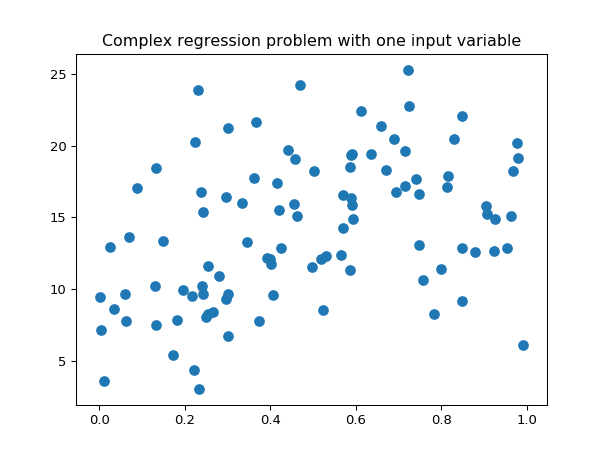

In [21]:
# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 1], y_F1, marker= 'o', s=50)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

In [26]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [  4.42036739   5.99661447   0.52894712  10.23751345   6.5507973
  -2.02082636  -0.32378811]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722


In [27]:
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)
print(X_F1_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

(100, 36)
(poly deg 2) linear model coeff (w):
[  3.40951018e-12   1.66452443e+01   2.67285381e+01  -2.21348316e+01
   1.24359227e+01   6.93086826e+00   1.04772675e+00   3.71352773e+00
  -1.33785505e+01  -5.73177185e+00   1.61813184e+00   3.66399592e+00
   5.04513181e+00  -1.45835979e+00   1.95156872e+00  -1.51297378e+01
   4.86762224e+00  -2.97084269e+00  -7.78370522e+00   5.14696078e+00
  -4.65479361e+00   1.84147395e+01  -2.22040650e+00   2.16572630e+00
  -1.27989481e+00   1.87946559e+00   1.52962716e-01   5.62073813e-01
  -8.91697516e-01  -2.18481128e+00   1.37595426e+00  -4.90336041e+00
  -2.23535458e+00   1.38268439e+00  -5.51908208e-01  -1.08795007e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805



In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]
(poly deg 2 + ridge) linear model intercept (b): 5.418
(poly deg 2 + ridge) R-squared score (training): 0.826
(poly deg 2 + ridge) R-squared score (test): 0.825


### Linear models for classification: Logistic regression

We reload the fruits data we used last week but we simplify it by making it a binary classification problem (apple or not) and we will count on only two features (height and width) to predict the fruit.

In [43]:
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

y_fruits_apple = y_fruits_2d == 1 

In [48]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=100).fit(X_train, y_train)

In [59]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.73


<IPython.core.display.Javascript object>


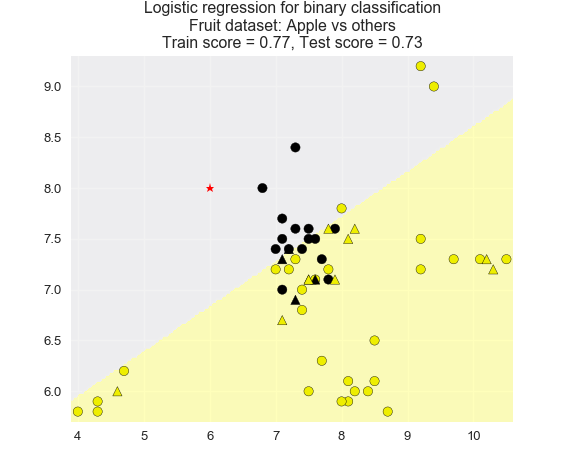

In [64]:
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(6, 5))
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)


In [61]:
h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

A fruit with height 6 and width 8 is predicted to be: an apple


In [65]:
subaxes.plot(h,w,'r*')